# Importing dataset from Kaggle


In [2]:
!nvidia-smi

Tue Jan  3 13:45:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    31W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"snirtahasa","key":"b416ac036a87312e03668cdbbcefeed1"}'}

In [5]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

-rw-r--r-- 1 root root 66 Jan  3 13:45 kaggle.json
/content


In [6]:
!kaggle datasets download -d utkarshsaxenadn/landscape-recognition-image-dataset-12k-images

 99% 490M/496M [00:05<00:00, 65.3MB/s]
100% 496M/496M [00:05<00:00, 96.6MB/s]


In [7]:
!# Get helper functions file
import os 

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

--2023-01-03 13:45:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-03 13:45:42 (80.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [8]:
import tensorflow as tf
from tensorflow.keras import layers

# Import series of helper functions for the notebook 
from helper_functions import create_tensorboard_callback, load_and_prep_image, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, make_confusion_matrix

In [9]:
unzip_data('landscape-recognition-image-dataset-12k-images.zip')

In [10]:
# Walk through  data directory and list number of files
walk_through_dir("Landscape Classification")

There are 1 directories and 0 images in 'Landscape Classification'.
There are 4 directories and 0 images in 'Landscape Classification/Landscape Classification'.
There are 5 directories and 0 images in 'Landscape Classification/Landscape Classification/Validation Data'.
There are 0 directories and 300 images in 'Landscape Classification/Landscape Classification/Validation Data/Mountain'.
There are 0 directories and 300 images in 'Landscape Classification/Landscape Classification/Validation Data/Desert'.
There are 0 directories and 300 images in 'Landscape Classification/Landscape Classification/Validation Data/Coast'.
There are 0 directories and 300 images in 'Landscape Classification/Landscape Classification/Validation Data/Forest'.
There are 0 directories and 300 images in 'Landscape Classification/Landscape Classification/Validation Data/Glacier'.
There are 5 directories and 0 images in 'Landscape Classification/Landscape Classification/Testing Data'.
There are 0 directories and 100 

In [11]:
train_dir_path = 'Landscape Classification/Landscape Classification/Training Data'
test_dir_path = 'Landscape Classification/Landscape Classification/Testing Data'
validation_dir_path = 'Landscape Classification/Landscape Classification/Validation Data'

In [100]:
IMG_SIZE = (224, 224) # define image size
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_path,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=BATCH_SIZE,
                                                                            shuffle = True) # batch_size is 32 by default, this is generally a good number

validation_data = tf.keras.preprocessing.image_dataset_from_directory(directory=validation_dir_path,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE,
                                                                           shuffle = True)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_path,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           shuffle = False)
     

Found 10000 files belonging to 5 classes.
Found 1500 files belonging to 5 classes.
Found 500 files belonging to 5 classes.


In [13]:
test_data.class_names[0:]

['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']

In [14]:
# Check the training data datatype
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [15]:
# Check out the class names of our dataset
train_data.class_names

['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']

In [16]:
# See an example batch of data
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.58348221e+02 1.69348221e+02 2.14348221e+02]
   [1.21089287e+02 1.30053574e+02 1.74544647e+02]
   [8.52857056e+01 9.05892792e+01 1.32892853e+02]
   ...
   [1.00000000e+00 1.41000000e+02 2.16000000e+02]
   [1.00000000e+00 1.41491089e+02 2.15017822e+02]
   [1.00000000e+00 1.42000000e+02 2.14000000e+02]]

  [[9.57142868e+01 1.04839287e+02 1.50464294e+02]
   [8.46216507e+01 9.26651764e+01 1.37463165e+02]
   [1.04928574e+02 1.10232147e+02 1.52535721e+02]
   ...
   [9.05128479e-01 1.42344879e+02 2.16625000e+02]
   [6.81930542e-01 1.42752228e+02 2.15642822e+02]
   [4.81029510e-01 1.43143967e+02 2.14625000e+02]]

  [[8.23783493e+01 8.88783417e+01 1.34503357e+02]
   [8.51171875e+01 9.11082611e+01 1.36097107e+02]
   [9.20647354e+01 9.58683014e+01 1.38864960e+02]
   ...
   [5.30128479e-01 1.44276794e+02 2.17375000e+02]
   [3.06930542e-01 1.44633911e+02 2.16392822e+02]
   [1.06029510e-01 1.44955353e+02 2.15375000e+02]]

  ...

  [[5.43649597e+01 4.29453125e+01 4.66685257e+01]
   [1

In [59]:
# See an example batch of data
for images, labels in test_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[106.02455   117.91071   170.1384   ]
   [118.09821   128.41518   183.43973  ]
   [129.98438   138.41518   198.26115  ]
   ...
   [ 33.        100.84607   214.       ]
   [ 33.         98.        214.       ]
   [ 33.         98.        214.       ]]

  [[106.171906  118.140656  176.00673  ]
   [111.268005  122.55817   181.68765  ]
   [117.138466  126.60724   190.08046  ]
   ...
   [ 33.412933  101.884026  214.10042  ]
   [ 33.47769    98.973206  214.22993  ]
   [ 33.0826     98.0826    214.0826   ]]

  [[ 96.46429   111.17634   177.68527  ]
   [ 99.66062   114.03115   181.40836  ]
   [106.22673   118.800385  189.15402  ]
   ...
   [ 34.111626  102.81927   214.68083  ]
   [ 33.843723  100.2411    214.14503  ]
   [ 33.594513   99.67934   214.05211  ]]

  ...

  [[ 28.06696    45.06696     9.171141 ]
   [ 36.337185   52.156357   18.252346 ]
   [ 31.232971   44.46665    14.904011 ]
   ...
   [ 28.166582   41.132027   12.155979 ]
   [ 42.399162   58.720688   15.947872 ]
   [ 

In [17]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

## Visualizing the data

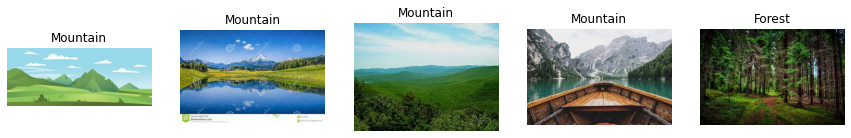

In [18]:
# Plot multiple random images from the traning dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import random
plt.figure(figsize=(15, 15))
for i in range(5):
  target_class = random.choice(train_data.class_names) # choose a random class
  target_dir = "/content/Landscape Classification/Landscape Classification/Training Data/" + target_class # create the target directory
  random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
  random_image_path = target_dir + "/" + random_image # create the choosen random image path
  img = mpimg.imread(random_image_path) # read in the chosen target image
  ax = plt.subplot(1, 5, i + 1)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

# Model 0: Building a transfer learning model using the Keras Functional API

In [19]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(5, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_model_0 = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=validation_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps= int(0.25*len(validation_data)), 
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback(dir_name = "Tensor_Board",
                                                                        experiment_name = "Transfer_learning_feature_extraction_5_epochs")])

16705208/16705208 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: Tensor_Board/Transfer_learning_feature_extraction_5_epochs/20230103-134609
Epoch 1/5
313/313 [==============================] - 38s 81ms/step - loss: 0.5346 - accuracy: 0.8293 - val_loss: 0.5641 - val_accuracy: 0.7869
Epoch 2/5
313/313 [==============================] - 25s 80ms/step - loss: 0.3539 - accuracy: 0.8820 - val_loss: 0.4926 - val_accuracy: 0.8352
Epoch 3/5
313/313 [==============================] - 24s 74ms/step - loss: 0.3132 - accuracy: 0.8961 - val_loss: 0.4688 - val_accuracy: 0.8267
Epoch 4/5
313/313 [==============================] - 24s 76ms/step - loss: 0.2949 - accuracy: 0.9026 - val_loss: 0.4525 - val_accuracy: 0.8523
Epoch 5/5
313/313 [==============================] - 24s 75ms/step - loss: 0.2776 - accuracy: 0.9099 - val_loss: 0.4748 - val_accuracy: 0.8466


In [20]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)
     

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [21]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [22]:
# Check summary of model constructed with Functional API
model_0.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 6,405
Non-trainable params: 4,049,571
_________________________________________________________________


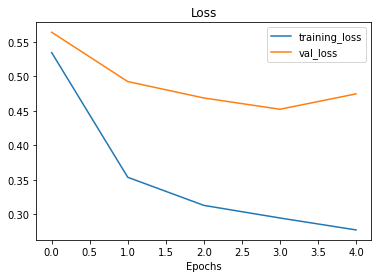

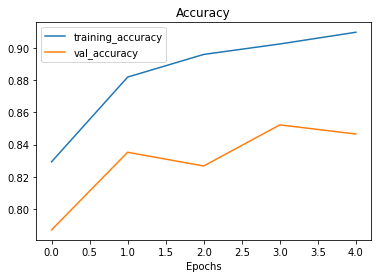

In [23]:
# Check out our model's training curves
plot_loss_curves(history_model_0)

In [24]:
result_model_0 = model_0.evaluate(test_data)

16/16 [==============================] - 2s 102ms/step - loss: 0.2582 - accuracy: 0.8960


#Model 1: Building a transfer learning model using the Keras Functional API

In [25]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(5, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_1 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_model_1 = model_1.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=validation_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps= int(0.25* len(validation_data)), 
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback(dir_name = "Tensor_Board",
                                                                        experiment_name = "Transfer_learning_feature_extraction_10_epochs")])

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: Tensor_Board/Transfer_learning_feature_extraction_10_epochs/20230103-134938
Epoch 1/10
313/313 [==============================] - 31s 81ms/step - loss: 0.5240 - accuracy: 0.8324 - val_loss: 0.4904 - val_accuracy: 0.8210
Epoch 2/10
313/313 [==============================] - 24s 76ms/step - loss: 0.3492 - accuracy: 0.8854 - val_loss: 0.4910 - val_accuracy: 0.8295
Epoch 3/10
313/313 [==============================] - 24s 76ms/step - loss: 0.3162 - accuracy: 0.8932 - val_loss: 0.4576 - val_accuracy: 0.8295
Epoch 4/10
313/313 [==============================] - 27s 85ms/step - loss: 0.2925 - accuracy: 0.9036 - val_loss: 0.4269 - val_accuracy: 0.8466
Epoch 5/10
313/313 [==============================] - 24s 76ms/step - loss: 0.2756 - accuracy: 0.9093 - val_loss: 0.4202 - val_accuracy: 0.8580
Epoch 6/10
313/313 [==============================] - 24s 76ms/step - loss: 0.2633 

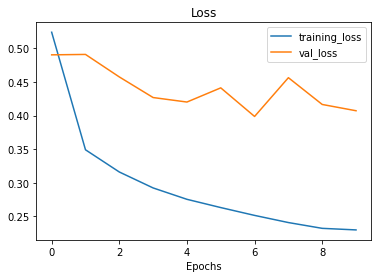

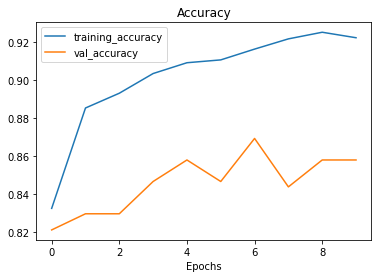

In [26]:
# Check out our model's training curves
plot_loss_curves(history_model_1)

In [27]:
result_model_1 = model_1.evaluate(test_data)

16/16 [==============================] - 1s 73ms/step - loss: 0.2546 - accuracy: 0.8960


#Model 2: Feature extraction transfer learning 5 epochs with data augmentation

###Adding data augmentation right into the model

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal",),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2)
], name ="data_augmentation")

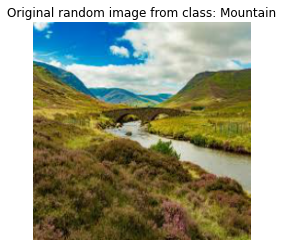

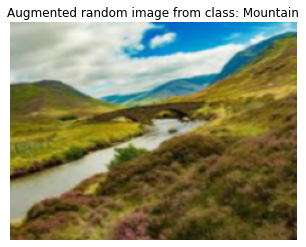

In [33]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names) # choose a random class
target_dir = "/content/Landscape Classification/Landscape Classification/Training Data/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image.
img = tf.image.resize(img/255., [224,224])
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image

img = tf.cast(tf.expand_dims(img, axis=0), tf.float32)
augmented_img = data_augmentation(img,training=True) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [34]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs, training=True)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_model_2 = model_2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=int(0.25* len(validation_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("Tensor_Board", "Transfer_learning_fiture_ext_5_epochs_aug")])

Saving TensorBoard log files to: Tensor_Board/Transfer_learning_fiture_ext_5_epochs_aug/20230103-135730
Epoch 1/5
313/313 [==============================] - 104s 312ms/step - loss: 0.7215 - accuracy: 0.7399 - val_loss: 0.6962 - val_accuracy: 0.7216
Epoch 2/5
313/313 [==============================] - 82s 260ms/step - loss: 0.5304 - accuracy: 0.8102 - val_loss: 0.7205 - val_accuracy: 0.7216
Epoch 3/5
313/313 [==============================] - 69s 219ms/step - loss: 0.4878 - accuracy: 0.8255 - val_loss: 0.6809 - val_accuracy: 0.7301
Epoch 4/5
313/313 [==============================] - 60s 192ms/step - loss: 0.4610 - accuracy: 0.8335 - val_loss: 0.6547 - val_accuracy: 0.7415
Epoch 5/5
313/313 [==============================] - 59s 188ms/step - loss: 0.4461 - accuracy: 0.8403 - val_loss: 0.6604 - val_accuracy: 0.7358


In [35]:
# Check out model summary
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 6,405
Non-trainab

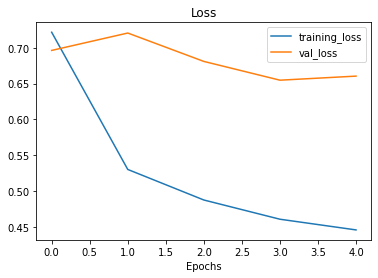

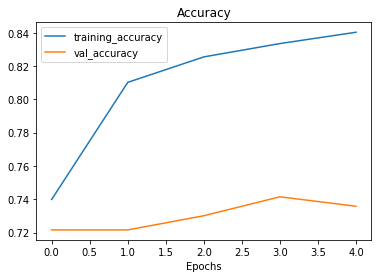

In [36]:
# How does the model go with a data augmentation layer
plot_loss_curves(history_model_2)

In [37]:
result_model_2 = model_2.evaluate(test_data)

16/16 [==============================] - 3s 172ms/step - loss: 0.4516 - accuracy: 0.8260


#Model 3: Feature extraction transfer learning 10 epochs with data augmentation

In [38]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs, training = True)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_3 = keras.Model(inputs, outputs)

# Compile the model
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_model_3 = model_3.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=int(0.25* len(validation_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("Tensor_Board", "Transfer_learning_fiture_ext_10_epochs_aug")])

Saving TensorBoard log files to: Tensor_Board/Transfer_learning_fiture_ext_10_epochs_aug/20230103-140452
Epoch 1/10
313/313 [==============================] - 60s 172ms/step - loss: 0.7354 - accuracy: 0.7308 - val_loss: 0.7369 - val_accuracy: 0.7188
Epoch 2/10
313/313 [==============================] - 51s 162ms/step - loss: 0.5340 - accuracy: 0.8079 - val_loss: 0.6596 - val_accuracy: 0.7727
Epoch 3/10
313/313 [==============================] - 50s 160ms/step - loss: 0.4926 - accuracy: 0.8228 - val_loss: 0.7530 - val_accuracy: 0.7216
Epoch 4/10
313/313 [==============================] - 48s 152ms/step - loss: 0.4693 - accuracy: 0.8336 - val_loss: 0.7052 - val_accuracy: 0.7472
Epoch 5/10
313/313 [==============================] - 47s 148ms/step - loss: 0.4473 - accuracy: 0.8401 - val_loss: 0.6978 - val_accuracy: 0.7443
Epoch 6/10
313/313 [==============================] - 45s 144ms/step - loss: 0.4393 - accuracy: 0.8434 - val_loss: 0.6683 - val_accuracy: 0.7528
Epoch 7/10
313/313 [=====

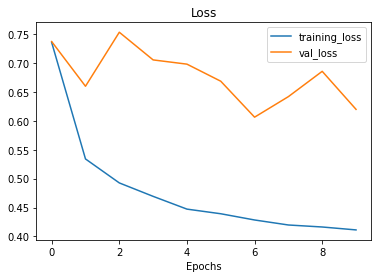

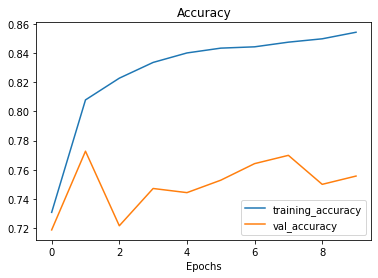

In [39]:
# How does the model go with a data augmentation layer
plot_loss_curves(history_model_3)

In [40]:
result_model_3 = model_3.evaluate(test_data)

16/16 [==============================] - 2s 119ms/step - loss: 0.4235 - accuracy: 0.8440


#Model 4: Fine-tuning an existing model

In [41]:
result_model_0, result_model_1, result_model_2, result_model_3,

([0.2582257390022278, 0.8960000276565552],
 [0.2546040415763855, 0.8960000276565552],
 [0.4516308009624481, 0.8259999752044678],
 [0.42349183559417725, 0.843999981880188])

In [42]:
initial_epochs = 5

In [43]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 tf.math.truediv_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [44]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_0.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [45]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 tf.math.truediv_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [46]:
print(len(model_2.trainable_variables))

2


In [47]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_model_0_fine_tune = model_0.fit(train_data,
                                        epochs=fine_tune_epochs,
                                        validation_data=validation_data,
                                        initial_epoch=history_model_0.epoch[-1], # start from previous last epoch
                                        validation_steps=int(0.25* len(validation_data)),
                                        callbacks=[create_tensorboard_callback("Transfer_learning", "Transfer_learning_fine_tune_10_epochs")]) # name expe

Saving TensorBoard log files to: Transfer_learning/Transfer_learning_fine_tune_10_epochs/20230103-142353
Epoch 5/10
313/313 [==============================] - 31s 79ms/step - loss: 0.2574 - accuracy: 0.9157 - val_loss: 0.4251 - val_accuracy: 0.8580
Epoch 6/10
313/313 [==============================] - 24s 74ms/step - loss: 0.2562 - accuracy: 0.9167 - val_loss: 0.3882 - val_accuracy: 0.8665
Epoch 7/10
313/313 [==============================] - 24s 75ms/step - loss: 0.2516 - accuracy: 0.9177 - val_loss: 0.4187 - val_accuracy: 0.8608
Epoch 8/10
313/313 [==============================] - 24s 75ms/step - loss: 0.2506 - accuracy: 0.9197 - val_loss: 0.4175 - val_accuracy: 0.8580
Epoch 9/10
313/313 [==============================] - 23s 74ms/step - loss: 0.2488 - accuracy: 0.9194 - val_loss: 0.4035 - val_accuracy: 0.8636
Epoch 10/10
313/313 [==============================] - 24s 74ms/step - loss: 0.2463 - accuracy: 0.9210 - val_loss: 0.4818 - val_accuracy: 0.8381


In [48]:
# Evaluate the model on the test data
results_model_0_fine_tune = model_0.evaluate(test_data)

16/16 [==============================] - 1s 73ms/step - loss: 0.2601 - accuracy: 0.8980


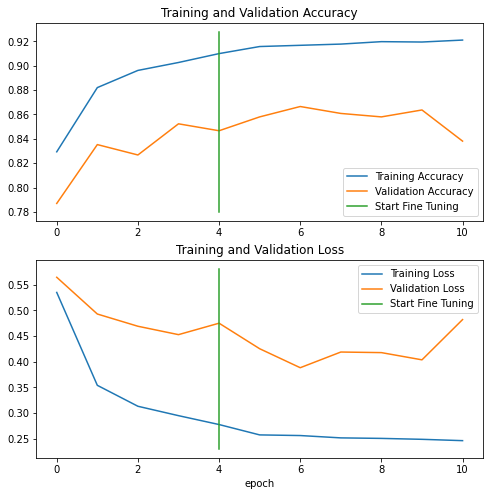

In [49]:
compare_historys(original_history=history_model_0, 
                 new_history=history_model_0_fine_tune, 
                 initial_epochs=5)

In [50]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

# Viewing our experiment data on TensorBoard

In [51]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./Transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with fine-tuning" \
  --one_shot # exits the uploader when upload has finished


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=wf5LXwCs8gbzY6VnxZMZEnfljfLIxD&prompt=consent&access_type=o

# Evaluating and visualizing our models predictions

In [101]:
# Make predictions with model
prediction_probability = model_0.predict(test_data, verbose=1) # set verbosity to see how long it will take 

16/16 [==============================] - 1s 71ms/step


In [102]:
# Get the class predicitons of each label
pred_classes = prediction_probability.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [104]:
# Check to see if loaded model is a trained model
loaded_loss, loaded_accuracy = model_0.evaluate(test_data)
loaded_loss, loaded_accuracy

16/16 [==============================] - 1s 74ms/step - loss: 0.2601 - accuracy: 0.8980


(0.2601173222064972, 0.8980000019073486)

In [105]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.898

In [106]:
# Does the evaluate method compare to the Scikit-Learn measured accuracy?
import numpy as np
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 1.9073486123843963e-09


In [107]:
# Get the class names
class_names = test_data.class_names
class_names

['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']

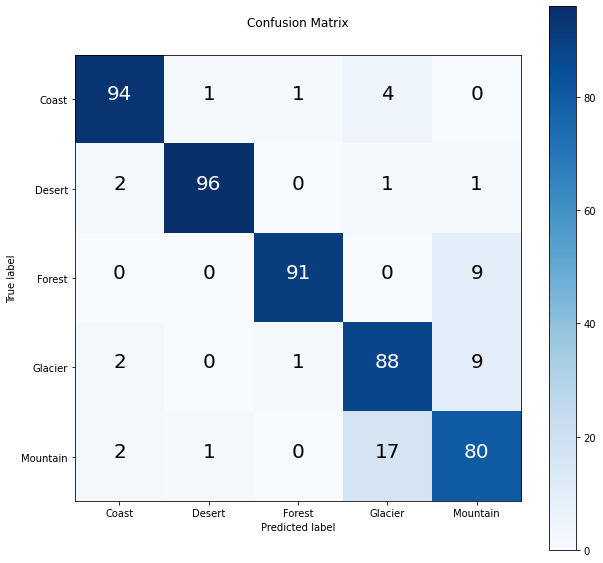

In [108]:
# Plot a confusion matrix with all  predictions, ground truth labels
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(10, 10),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       100
           1       0.98      0.96      0.97       100
           2       0.98      0.91      0.94       100
           3       0.80      0.88      0.84       100
           4       0.81      0.80      0.80       100

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [110]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.94, 'recall': 0.94, 'f1-score': 0.94, 'support': 100},
 '1': {'precision': 0.9795918367346939,
  'recall': 0.96,
  'f1-score': 0.9696969696969697,
  'support': 100},
 '2': {'precision': 0.978494623655914,
  'recall': 0.91,
  'f1-score': 0.9430051813471503,
  'support': 100},
 '3': {'precision': 0.8,
  'recall': 0.88,
  'f1-score': 0.8380952380952381,
  'support': 100},
 '4': {'precision': 0.8080808080808081,
  'recall': 0.8,
  'f1-score': 0.8040201005025126,
  'support': 100},
 'accuracy': 0.898,
 'macro avg': {'precision': 0.9012334536942831,
  'recall': 0.898,
  'f1-score': 0.8989634979283743,
  'support': 500},
 'weighted avg': {'precision': 0.9012334536942833,
  'recall': 0.898,
  'f1-score': 0.898963497928374,
  'support': 500}}

In [111]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'Coast': 0.94,
 'Desert': 0.9696969696969697,
 'Forest': 0.9430051813471503,
 'Glacier': 0.8380952380952381,
 'Mountain': 0.8040201005025126}

In [112]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
1,Desert,0.969697
2,Forest,0.943005
0,Coast,0.940000
3,Glacier,0.838095
4,Mountain,0.804020


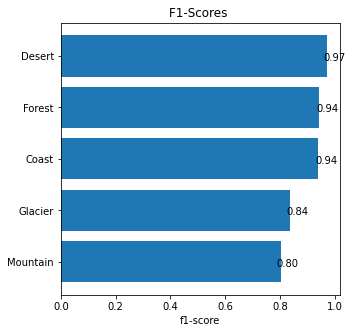

In [113]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores ")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

1/1 [==============================] - 0s 23ms/step


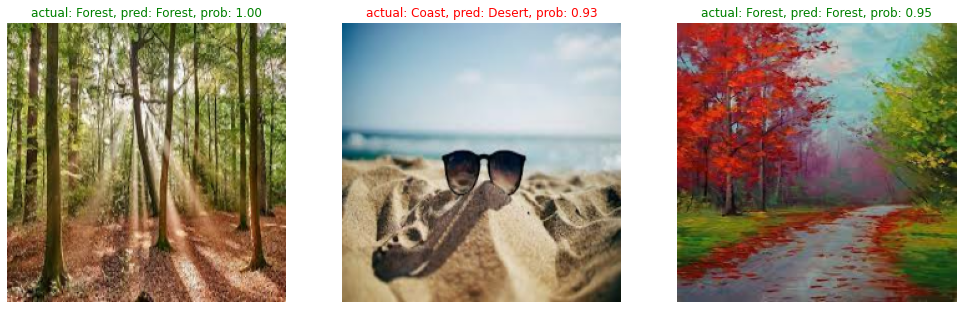

In [114]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class 
  class_name = test_data.class_names
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir_path + "/" + class_name))
  filepath = test_dir_path +'/'+ class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model_0.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

#Finding the most wrong predictions

In [115]:
# 1. Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files('Landscape Classification/Landscape Classification/Testing Data/*/*.jpeg', 
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (1).jpeg',
 b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (100).jpeg',
 b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (101).jpeg',
 b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (102).jpeg',
 b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (103).jpeg',
 b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (104).jpeg',
 b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (105).jpeg',
 b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (106).jpeg',
 b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (107).jpeg',
 b'Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (108).jpeg']

In [116]:
# 2. Create a dataframe out of current prediction data for analysis
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": prediction_probability.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]}) 
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'Landscape Classification/Landscape Classific...,0,0,0.998783,Coast,Coast
1,b'Landscape Classification/Landscape Classific...,0,0,0.994504,Coast,Coast
2,b'Landscape Classification/Landscape Classific...,0,0,0.918190,Coast,Coast
3,b'Landscape Classification/Landscape Classific...,0,0,0.993426,Coast,Coast
4,b'Landscape Classification/Landscape Classific...,0,0,0.996875,Coast,Coast


In [117]:
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'Landscape Classification/Landscape Classific...,0,0,0.998783,Coast,Coast,True
1,b'Landscape Classification/Landscape Classific...,0,0,0.994504,Coast,Coast,True
2,b'Landscape Classification/Landscape Classific...,0,0,0.918190,Coast,Coast,True
3,b'Landscape Classification/Landscape Classific...,0,0,0.993426,Coast,Coast,True
4,b'Landscape Classification/Landscape Classific...,0,0,0.996875,Coast,Coast,True


In [118]:
# 4. Get the top 100 wrong examples
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
393,b'Landscape Classification/Landscape Classific...,3,4,0.960984,Glacier,Mountain,False
223,b'Landscape Classification/Landscape Classific...,2,4,0.941157,Forest,Mountain,False
52,b'Landscape Classification/Landscape Classific...,0,1,0.934309,Coast,Desert,False
285,b'Landscape Classification/Landscape Classific...,2,4,0.934274,Forest,Mountain,False
426,b'Landscape Classification/Landscape Classific...,4,3,0.909949,Mountain,Glacier,False
482,b'Landscape Classification/Landscape Classific...,4,3,0.893452,Mountain,Glacier,False
73,b'Landscape Classification/Landscape Classific...,0,3,0.884486,Coast,Glacier,False
207,b'Landscape Classification/Landscape Classific...,2,4,0.875516,Forest,Mountain,False
454,b'Landscape Classification/Landscape Classific...,4,3,0.870143,Mountain,Glacier,False
356,b'Landscape Classification/Landscape Classific...,3,4,0.833923,Glacier,Mountain,False


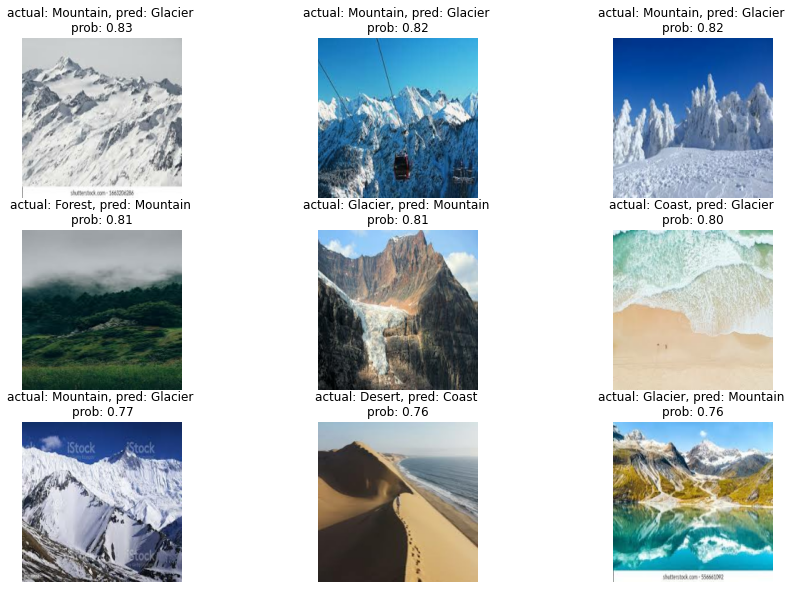

In [119]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)